Just some simple animation. The second Example uses a custom class that allows you to create animation recording something or using generators.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
from utils.ExtendedAnimation import ExtendedAnimation
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
plt.close()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(num):
    l.set_data(t[:num], x[:num])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))


ani

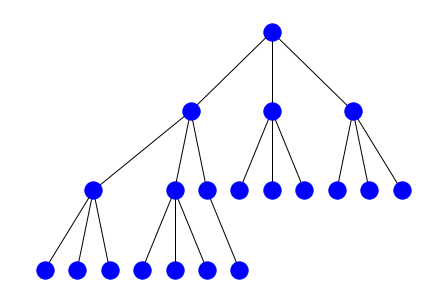

In [2]:
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx

G = nx.full_rary_tree(3, 20, create_using=nx.Graph(color="b")) 
pos = graphviz_layout(G, prog="dot")

nx.draw(G, pos=pos, node_color="b")

In [3]:
a = ExtendedAnimation(plt.gcf(), interval=250)
nx.draw(G, pos=pos, node_color="b")
a.save_frame()
node_color = ["b"] * len(G.nodes)
def update(node = 0, origin = None):
    node_color[node] = "r"
    nx.draw(G, pos=pos, node_color=node_color, edge_color=["r" if node_color[e[0]] == "r" and node_color[e[1]] == "r" else "black" for e in G.edges()])
    a.save_frame()
    for i in G.neighbors(node):
        if i != origin:
            update(i, node)
        
update()
plt.close()
a

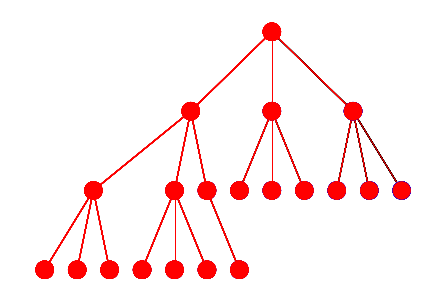

In [4]:
node_color = ["b"] * len(G.nodes)
def animate(a, node = 0, origin = None):
    node_color[node] = "r"
    nx.draw(G, pos=pos, node_color=node_color, edge_color=["r" if node_color[e[0]] == "r" and node_color[e[1]] == "r" else "black" for e in G.edges()])
    a.save_frame()
    for i in G.neighbors(node):
        if i != origin:
            update(i, node)

a = ExtendedAnimation(plt.gcf(), animate, interval=100)
a

In [5]:
t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
plt.close()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate():
    for num in range(len(t)):
        l.set_data(t[:num], x[:num])
        yield

a = ExtendedAnimation(fig, animate, interval=100)
a